In [ ]:
# Cell 1: Setup & File Upload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import io

# Set modern visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
OUTPUT_PREFIX = 'advanced_seo_'

print("="*80)
print("🚀 ADVANCED SEO AUDIT VISUALIZATION SUITE")
print("="*80)
print("Professional visualizations for executive reporting")
print("="*80)

# File upload widget
print("\n📁 STEP 1: Upload your SEO Audit CSV file")
uploaded = files.upload()

# Get the uploaded filename
if uploaded:
    filename = list(uploaded.keys())[0]
    print(f" File uploaded: {filename}")
else:
    print(" No file uploaded. Please run this cell again.")
    filename = None

 ADVANCED SEO AUDIT VISUALIZATION SUITE
Professional visualizations for executive reporting

 Upload your SEO Audit CSV file


Saving Deuxpardeux Citation Audit.csv to Deuxpardeux Citation Audit (1).csv
 File uploaded: Deuxpardeux Citation Audit (1).csv


In [ ]:
# Cell 2: Data Loading & Processing
print("\n[1/6] Loading and processing data...")

if not uploaded:
    print(" Please upload a file in Cell 1 first!")
else:
    # Load the uploaded file
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

    # Display basic info
    print(f" Loaded {len(df)} records from {filename}")
    print(f" Columns found: {list(df.columns)}")

    # Validate required columns
    required_columns = ['cited_url', 'domain', 'cooccurrence_strength_normalized', 'keyword', 'volume', 'rank', 'CC_Index', 'Oppportunity']
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f" Missing columns: {missing_columns}")
        print("Please check your file format and try again.")
    else:
        print(" All required columns present!")

        # Display sample data
        print("\n📋 Sample of your data:")
        print(df.head(2))

        # Clean and prepare data
        df['volume_clean'] = pd.to_numeric(df['volume'].replace('not in DFS', np.nan), errors='coerce')
        df['rank_clean'] = pd.to_numeric(df['rank'].replace('not in DFS', np.nan), errors='coerce')

        # Create citation categories
        df['citation_category'] = pd.cut(df['cooccurrence_strength_normalized'],
                                           bins=[0.65, 0.75, 0.85, 0.95, 1.0],
                                           labels=['Low', 'Medium', 'High', 'Very High'])

        # Create domain type classification
        def classify_domain(url):
            if pd.isna(url):
                return 'Other'
            url_lower = str(url).lower()
            if 'youtube' in url_lower:
                return 'YouTube'
            elif 'reddit' in url_lower:
                return 'Reddit'
            elif 'google' in url_lower:
                return 'Google'
            elif 'blog' in url_lower:
                return 'Blog'
            elif 'pinterest' in url_lower:
                return 'Pinterest'
            else:
                return 'Other'

        df['domain_type'] = df['domain'].apply(classify_domain)

        # Convert CC_Index to boolean
        df['page_indexed'] = df['CC_Index'].astype(bool)

        # Create opportunity categories
        def classify_opportunity(opp):
            if pd.isna(opp):
                return 'Unknown'
            opp_str = str(opp)
            if 'High' in opp_str:
                return 'High'
            elif 'Medium' in opp_str:
                return 'Medium'
            else:
                return 'Low'

        df['opportunity_level'] = df['Oppportunity'].apply(classify_opportunity)

        print(f"\n✅ Data processing complete:")
        print(f"   📈 {df['domain'].nunique()} unique domains")
        print(f"   🔑 {df['keyword'].nunique()} unique keywords")
        print(f"   🎯 High opportunities: {(df['opportunity_level'] == 'High').sum()} records")


[1/6] Loading and processing data...
 Loaded 110 records from Deuxpardeux Citation Audit (1).csv
 Columns found: ['cited_url', 'domain', 'cooccurrence_strength_normalized', 'keyword', 'volume', 'rank', 'CC_Index', 'Oppportunity', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']
 All required columns present!

 Sample of your data:
                                           cited_url                  domain  \
0  https://www.housebeautiful.com/lifestyle/kids-...  www.housebeautiful.com   
1  https://blog.teepeejoy.com/popular-nursery-the...      blog.teepeejoy.com   

   cooccurrence_strength_normalized              keyword  volume  rank  \
0                          1.000000  beauty inside salon  246000   3.5   
1                          0.869565  beauty inside salon  246000   3.5   

   CC_Index Oppportunity  Unnamed: 8    Unnamed: 9          Unnamed: 10  
0     False       1-High         NaN  Oppportunity  COUNTA of cited_url  
1      True       1-High         NaN        1-High          


[2/6] Creating Visualization 1: Opportunity-Strength Quadrant Analysis...


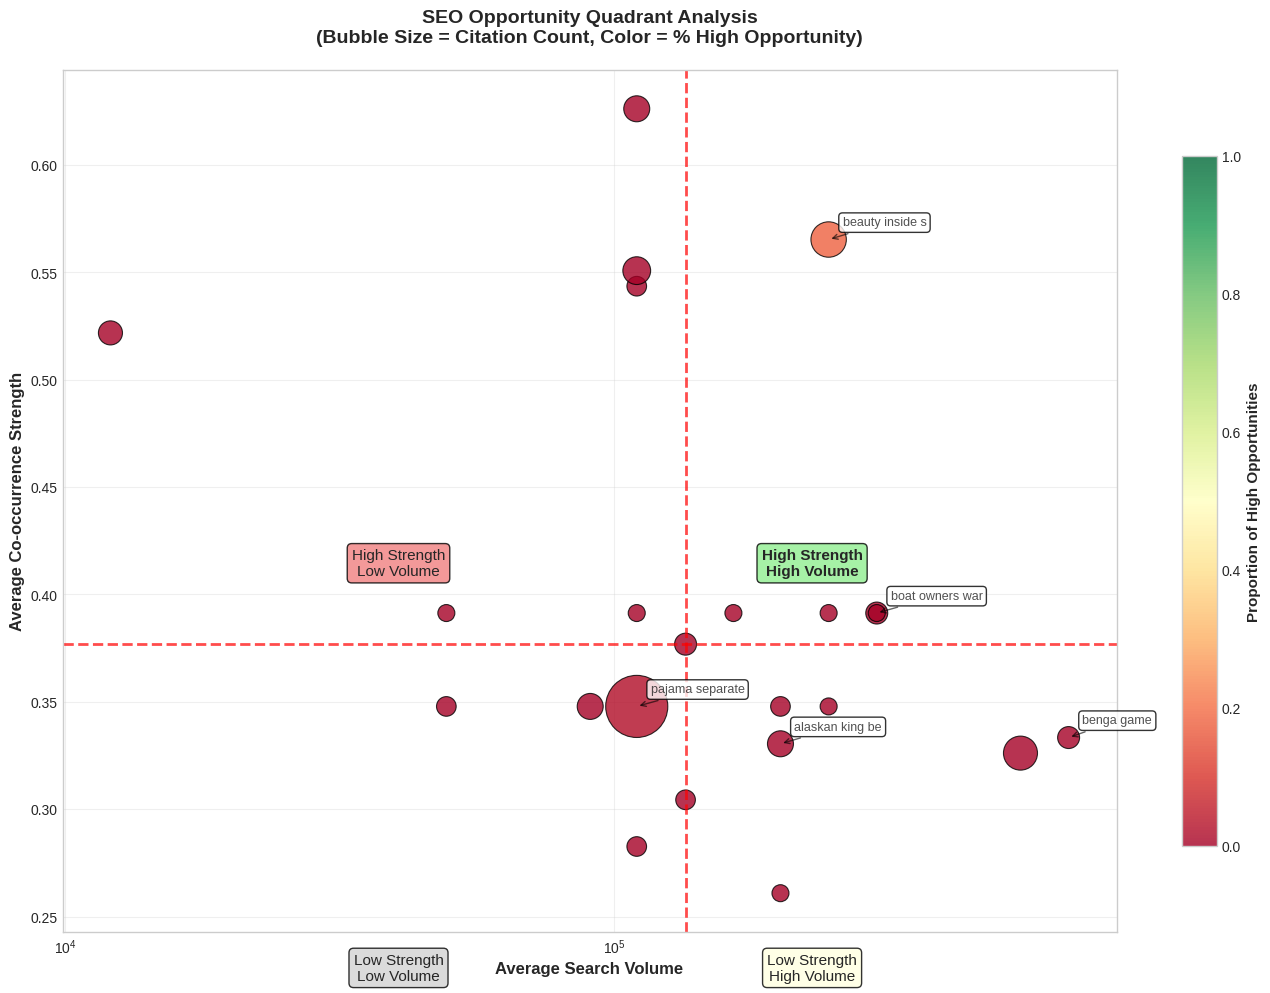

 Saved: advanced_seo_01_quadrant_analysis.png


In [ ]:
# Cell 3: Visualization 1 - Opportunity-Strength Quadrant Analysis
print("\n[2/6] Creating Visualization 1: Opportunity-Strength Quadrant Analysis...")

# Calculate metrics for quadrant analysis
quadrant_data = df.groupby('keyword').agg({
    'volume_clean': 'mean',
    'cooccurrence_strength_normalized': 'mean',
    'opportunity_level': lambda x: (x == 'High').mean(),
    'domain': 'count'
}).rename(columns={'domain': 'citation_count'}).dropna()

fig, ax = plt.subplots(figsize=(14, 10))

if len(quadrant_data) > 0:
    # Create quadrants
    vol_threshold = quadrant_data['volume_clean'].quantile(0.5)
    str_threshold = quadrant_data['cooccurrence_strength_normalized'].quantile(0.5)

    # Create scatter plot with advanced styling
    scatter = ax.scatter(quadrant_data['volume_clean'],
                        quadrant_data['cooccurrence_strength_normalized'],
                        c=quadrant_data['opportunity_level'],
                        s=quadrant_data['citation_count']*50 + 100,
                        cmap='RdYlGn', alpha=0.8,
                        edgecolors='black', linewidth=0.8,
                        vmin=0, vmax=1)

    # Add quadrant lines
    ax.axhline(y=str_threshold, color='red', linestyle='--', alpha=0.7, linewidth=2)
    ax.axvline(x=vol_threshold, color='red', linestyle='--', alpha=0.7, linewidth=2)

    # Quadrant labels with modern styling
    ax.text(vol_threshold * 0.3, str_threshold * 1.1, 'High Strength\nLow Volume',
            fontsize=11, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
    ax.text(vol_threshold * 1.7, str_threshold * 1.1, 'High Strength\nHigh Volume',
            fontsize=11, ha='center', va='center', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    ax.text(vol_threshold * 0.3, str_threshold * 0.6, 'Low Strength\nLow Volume',
            fontsize=11, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    ax.text(vol_threshold * 1.7, str_threshold * 0.6, 'Low Strength\nHigh Volume',
            fontsize=11, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

    # Modern styling
    ax.set_xlabel('Average Search Volume', fontsize=12, fontweight='bold')
    ax.set_ylabel('Average Co-occurrence Strength', fontsize=12, fontweight='bold')
    ax.set_title('SEO Opportunity Quadrant Analysis\n(Bubble Size = Citation Count, Color = % High Opportunity)',
                 fontsize=14, fontweight='bold', pad=20)

    # Log scale for better volume visualization
    ax.set_xscale('log')
    ax.grid(True, alpha=0.3)

    # Professional colorbar
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
    cbar.set_label('Proportion of High Opportunities', fontsize=11, fontweight='bold')

    # Annotate top opportunities
    top_opp = quadrant_data.nlargest(5, 'opportunity_level')
    for idx, row in top_opp.iterrows():
        ax.annotate(idx[:15],
                   xy=(row['volume_clean'], row['cooccurrence_strength_normalized']),
                   xytext=(10, 10), textcoords='offset points',
                   fontsize=9, alpha=0.8,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
                   arrowprops=dict(arrowstyle='->', alpha=0.6))

plt.tight_layout()
plt.savefig(f'{OUTPUT_PREFIX}01_quadrant_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print(" Saved: advanced_seo_01_quadrant_analysis.png")


[3/6] Creating Visualization 2: Domain Authority Heatmap...


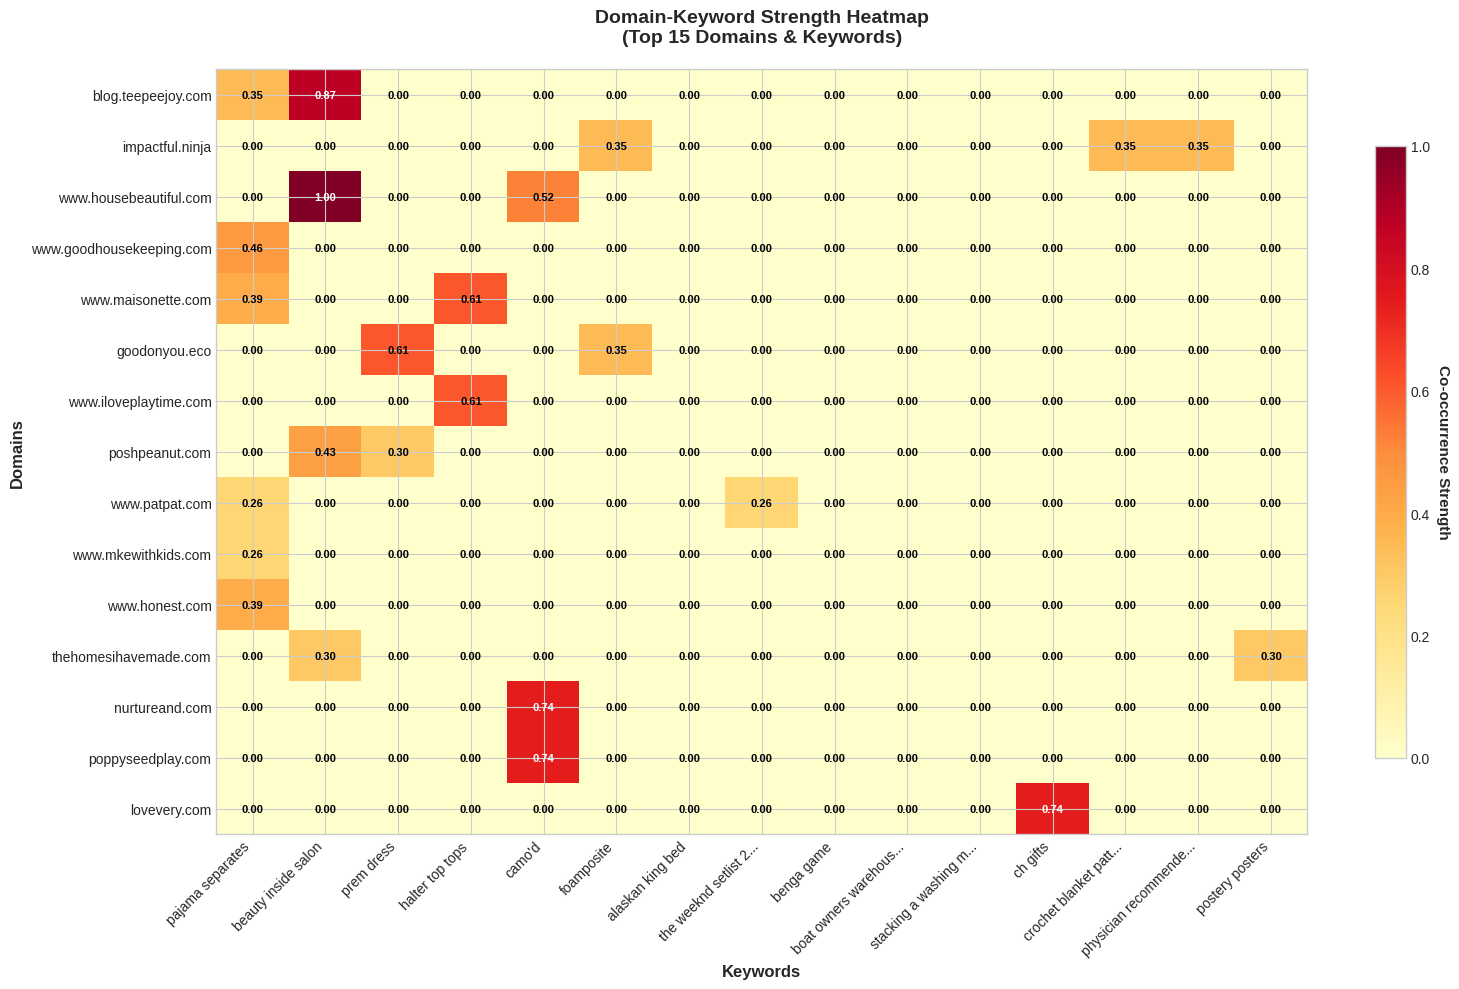

 Saved: advanced_seo_02_domain_heatmap.png


In [ ]:
# Cell 4: Visualization 2 - Domain Authority Heatmap
print("\n[3/6] Creating Visualization 2: Domain Authority Heatmap...")

# Prepare data for heatmap
top_domains = df['domain'].value_counts().head(15).index
top_keywords = df[df['keyword'] != 'not in DFS']['keyword'].value_counts().head(15).index

# Create strength matrix
strength_matrix = pd.DataFrame()

for domain in top_domains:
    domain_data = []
    for keyword in top_keywords:
        strength = df[(df['domain'] == domain) & (df['keyword'] == keyword)]['cooccurrence_strength_normalized'].mean()
        domain_data.append(strength if not np.isnan(strength) else 0)
    strength_matrix[domain] = domain_data

strength_matrix.index = top_keywords
strength_matrix = strength_matrix.T  # Transpose for better layout

fig, ax = plt.subplots(figsize=(16, 10))

# Create advanced heatmap
im = ax.imshow(strength_matrix, cmap='YlOrRd', aspect='auto', interpolation='nearest')

# Customize ticks
ax.set_xticks(np.arange(len(top_keywords)))
ax.set_yticks(np.arange(len(top_domains)))
ax.set_xticklabels([k[:20] + '...' if len(k) > 20 else k for k in top_keywords], rotation=45, ha='right')
ax.set_yticklabels([d.split('//')[-1][:25] + '...' if len(d) > 25 else d.split('//')[-1] for d in top_domains])

# Add value annotations
for i in range(len(top_domains)):
    for j in range(len(top_keywords)):
        text = ax.text(j, i, f'{strength_matrix.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black" if strength_matrix.iloc[i, j] < 0.7 else "white",
                      fontsize=8, fontweight='bold')

ax.set_title('Domain-Keyword Strength Heatmap\n(Top 15 Domains & Keywords)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Keywords', fontsize=12, fontweight='bold')
ax.set_ylabel('Domains', fontsize=12, fontweight='bold')

# Professional colorbar
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
cbar.ax.set_ylabel('Co-occurrence Strength', rotation=-90, va="bottom", fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{OUTPUT_PREFIX}02_domain_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print(" Saved: advanced_seo_02_domain_heatmap.png")


[4/6] Creating Visualization 3: SEO Performance Comparison...
⚠️  Using alternative visualization: Domain Performance Comparison


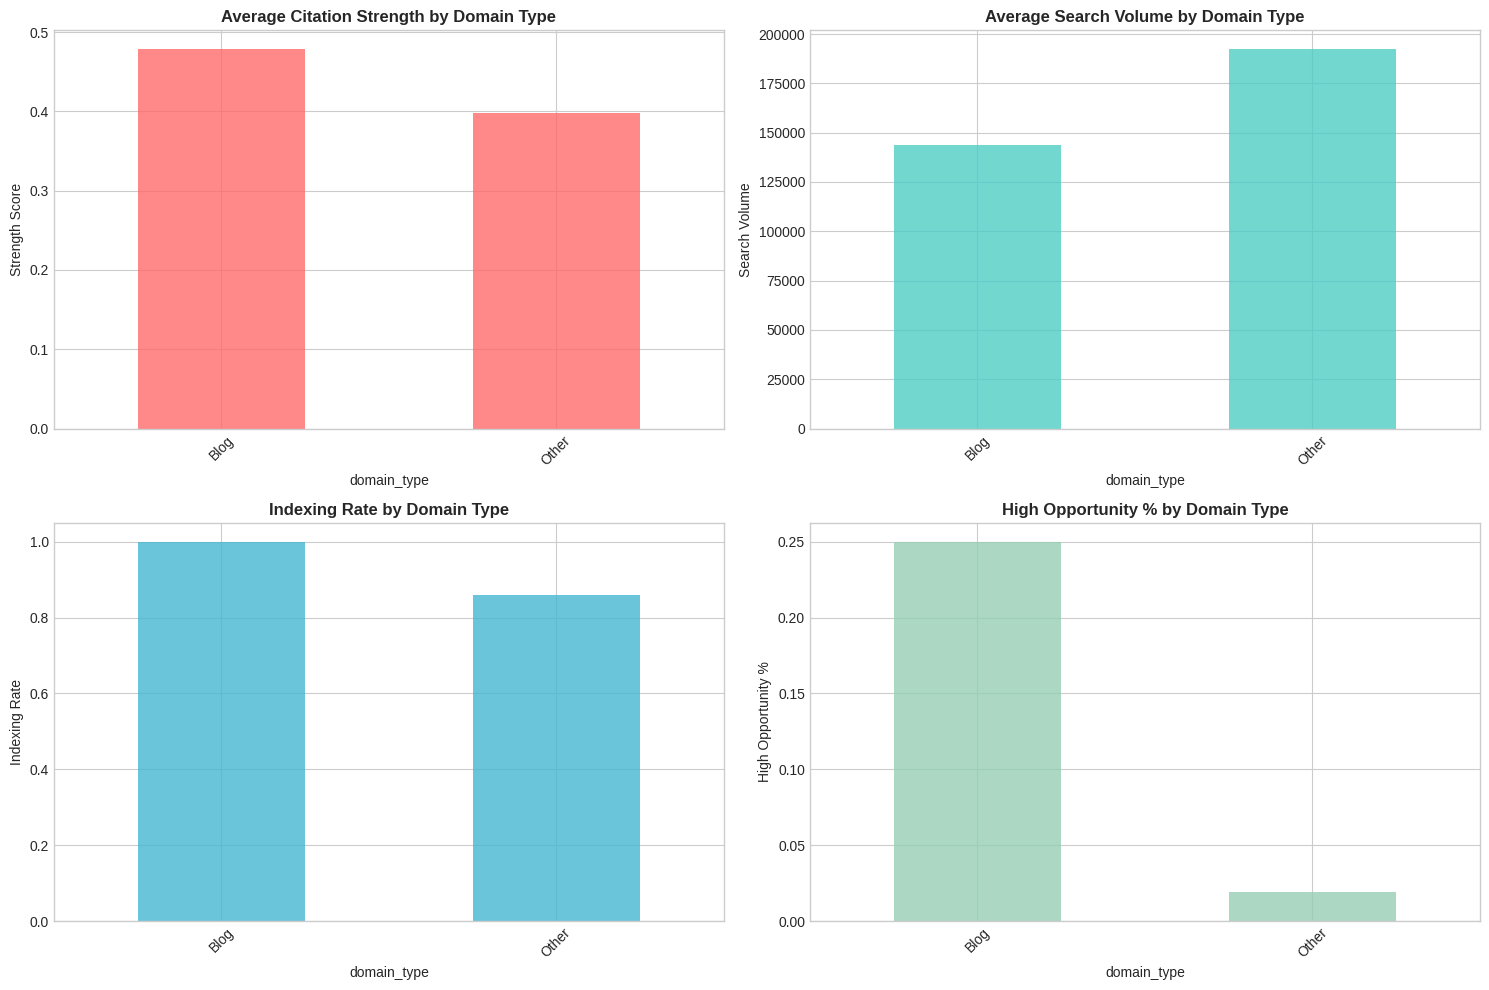

 Saved: advanced_seo_03_domain_comparison.png


In [ ]:
# Cell 5: Visualization 3 - SEO Performance Radar Chart (Fixed)
print("\n[4/6] Creating Visualization 3: SEO Performance Comparison...")

from math import pi

# Calculate performance metrics by domain type
radar_metrics = df.groupby('domain_type').agg({
    'cooccurrence_strength_normalized': 'mean',
    'volume_clean': 'mean',
    'page_indexed': 'mean',
    'opportunity_level': lambda x: (x == 'High').mean(),
    'domain': 'count'
}).rename(columns={'domain': 'count'}).dropna()

# Check if we have enough data for radar chart
if len(radar_metrics) >= 3:  # Need at least 3 domain types for meaningful radar
    # Select top domain types for radar chart
    top_domain_types = radar_metrics.nlargest(5, 'count').index

    # Normalize metrics for radar chart (0-1 scale)
    radar_normalized = radar_metrics.copy()
    for col in ['cooccurrence_strength_normalized', 'volume_clean', 'page_indexed', 'opportunity_level']:
        if radar_normalized[col].max() > 0:
            radar_normalized[col] = radar_normalized[col] / radar_normalized[col].max()

    # Set up radar chart
    categories = ['Citation Strength', 'Search Volume', 'Indexing Rate', 'High Opportunity %']
    N = len(categories)

    # Compute angles for radar chart
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Complete the circle

    fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))

    # Modern color palette
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

    # Plot each domain type
    for idx, (domain_type, color) in enumerate(zip(top_domain_types, colors)):
        values = radar_normalized.loc[domain_type, ['cooccurrence_strength_normalized', 'volume_clean',
                                                   'page_indexed', 'opportunity_level']].tolist()
        values += values[:1]  # Complete the circle

        ax.plot(angles, values, 'o-', linewidth=2, label=domain_type, color=color)
        ax.fill(angles, values, alpha=0.1, color=color)

    # Modern radar chart styling
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=11, fontweight='bold')
    ax.set_ylim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=10)
    ax.grid(True, alpha=0.3)

    ax.set_title('SEO Performance Radar Chart by Domain Type\n(Normalized Metrics)',
                 size=14, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=10)

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_PREFIX}03_radar_chart.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    print(" Saved: advanced_seo_03_radar_chart.png")

else:
    # ALTERNATIVE: Create a bar chart comparison instead
    print("  Using alternative visualization: Domain Performance Comparison")

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # Plot 1: Average strength by domain type
    if not radar_metrics.empty:
        radar_metrics['cooccurrence_strength_normalized'].plot(kind='bar', ax=ax1, color='#FF6B6B', alpha=0.8)
        ax1.set_title('Average Citation Strength by Domain Type', fontweight='bold')
        ax1.set_ylabel('Strength Score')
        ax1.tick_params(axis='x', rotation=45)

    # Plot 2: Volume by domain type
    if 'volume_clean' in radar_metrics.columns and not radar_metrics['volume_clean'].isna().all():
        radar_metrics['volume_clean'].plot(kind='bar', ax=ax2, color='#4ECDC4', alpha=0.8)
        ax2.set_title('Average Search Volume by Domain Type', fontweight='bold')
        ax2.set_ylabel('Search Volume')
        ax2.tick_params(axis='x', rotation=45)

    # Plot 3: Indexing rate by domain type
    if 'page_indexed' in radar_metrics.columns:
        radar_metrics['page_indexed'].plot(kind='bar', ax=ax3, color='#45B7D1', alpha=0.8)
        ax3.set_title('Indexing Rate by Domain Type', fontweight='bold')
        ax3.set_ylabel('Indexing Rate')
        ax3.tick_params(axis='x', rotation=45)

    # Plot 4: High opportunity percentage
    if 'opportunity_level' in radar_metrics.columns:
        radar_metrics['opportunity_level'].plot(kind='bar', ax=ax4, color='#96CEB4', alpha=0.8)
        ax4.set_title('High Opportunity % by Domain Type', fontweight='bold')
        ax4.set_ylabel('High Opportunity %')
        ax4.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_PREFIX}03_domain_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    print(" Saved: advanced_seo_03_domain_comparison.png")


[5/6] Creating Visualization 4: Advanced Distribution Analysis...


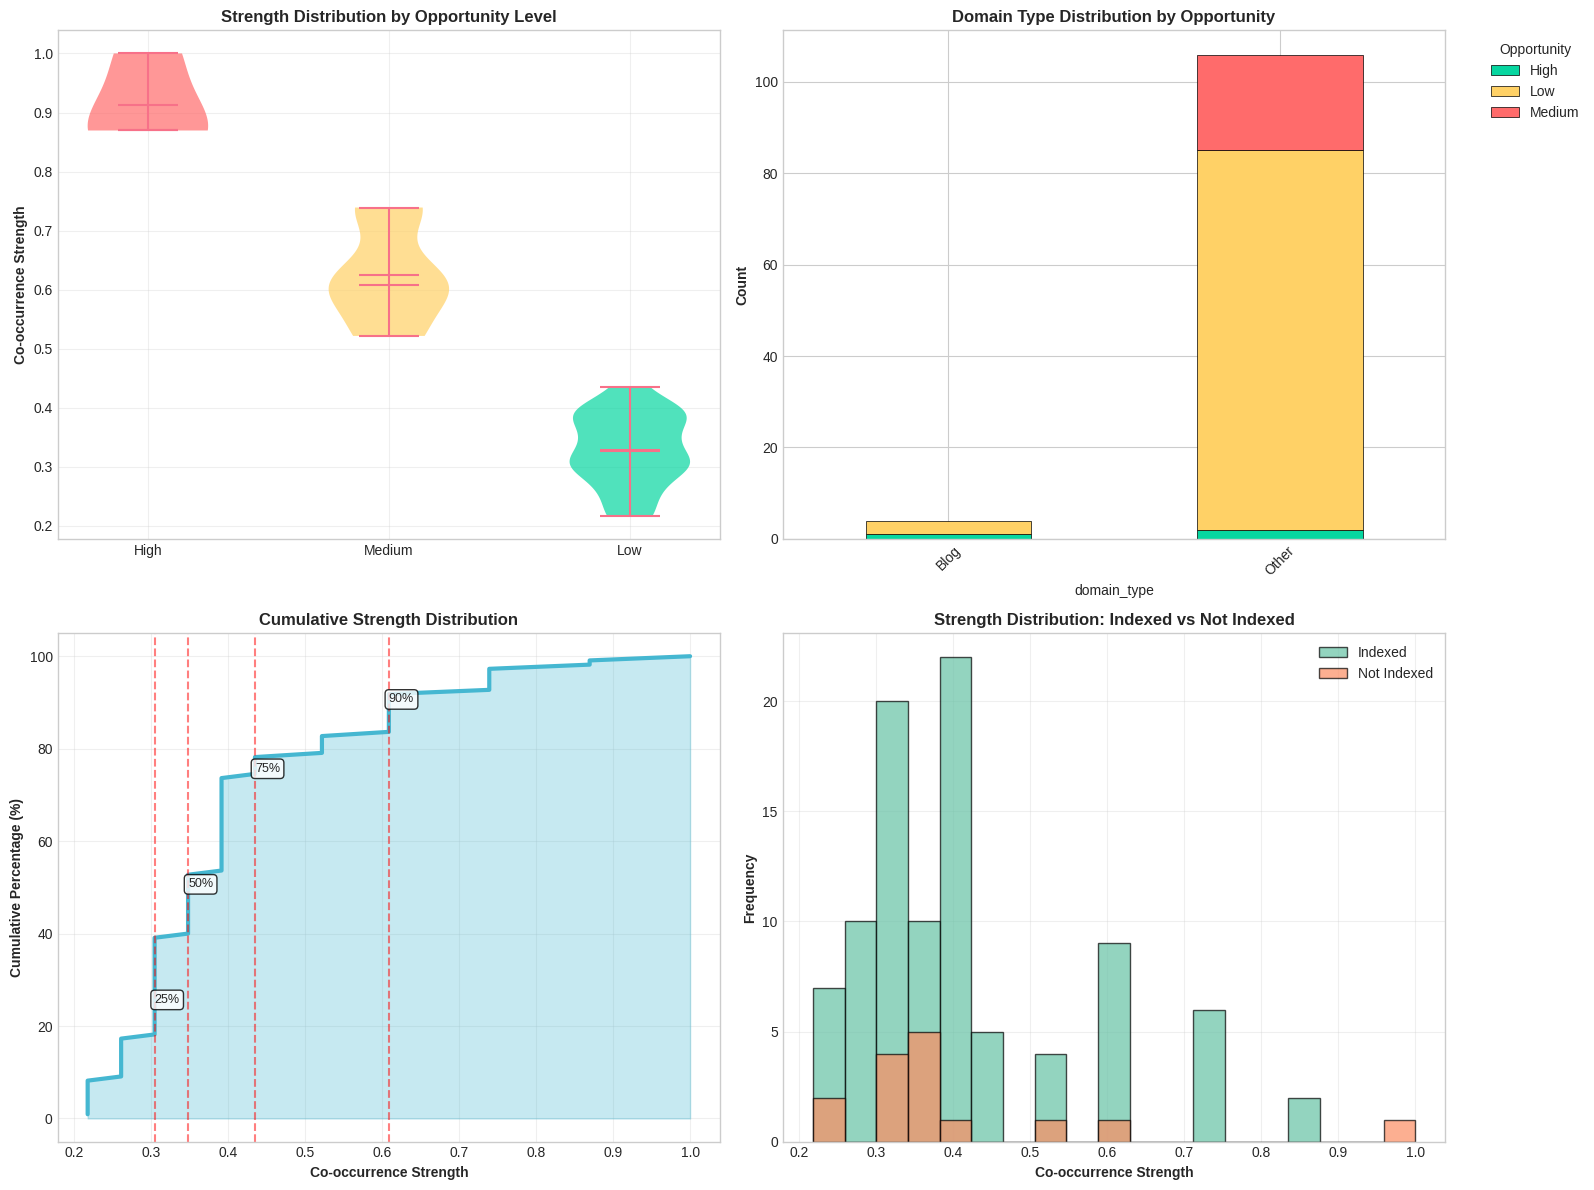

 Saved: advanced_seo_04_advanced_distributions.png


In [ ]:
# Cell 6: Visualization 4 - Citation Strength Distribution by Opportunity
print("\n[5/6] Creating Visualization 4: Advanced Distribution Analysis...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Violin plot - Strength by Opportunity Level
opportunity_data = [df[df['opportunity_level'] == level]['cooccurrence_strength_normalized']
                   for level in ['High', 'Medium', 'Low'] if level in df['opportunity_level'].values]

if opportunity_data:
    parts = ax1.violinplot(opportunity_data, showmeans=True, showmedians=True)

    # Customize violin colors
    colors = ['#ff6b6b', '#ffd166', '#06d6a0']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)

    ax1.set_xticks([1, 2, 3])
    ax1.set_xticklabels(['High', 'Medium', 'Low'])
    ax1.set_ylabel('Co-occurrence Strength', fontweight='bold')
    ax1.set_title('Strength Distribution by Opportunity Level', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)

# 2. Stacked bar - Domain type by opportunity
domain_opp = pd.crosstab(df['domain_type'], df['opportunity_level'])
if not domain_opp.empty:
    domain_opp.plot(kind='bar', stacked=True, ax=ax2,
                    color=['#06d6a0', '#ffd166', '#ff6b6b'],
                    edgecolor='black', linewidth=0.5)
    ax2.set_title('Domain Type Distribution by Opportunity', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Count', fontweight='bold')
    ax2.legend(title='Opportunity', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.tick_params(axis='x', rotation=45)

# 3. Cumulative distribution
sorted_scores = np.sort(df['cooccurrence_strength_normalized'])
cumulative = np.arange(1, len(sorted_scores) + 1) / len(sorted_scores) * 100

ax3.plot(sorted_scores, cumulative, linewidth=3, color='#45B7D1', label='Cumulative %')
ax3.fill_between(sorted_scores, cumulative, alpha=0.3, color='#45B7D1')
ax3.set_xlabel('Co-occurrence Strength', fontweight='bold')
ax3.set_ylabel('Cumulative Percentage (%)', fontweight='bold')
ax3.set_title('Cumulative Strength Distribution', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add percentile lines
for percentile in [25, 50, 75, 90]:
    value = np.percentile(df['cooccurrence_strength_normalized'], percentile)
    ax3.axvline(x=value, color='red', linestyle='--', alpha=0.5)
    ax3.text(value, percentile, f'{percentile}%', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 4. Indexing impact analysis
indexed_strength = df[df['page_indexed']]['cooccurrence_strength_normalized']
not_indexed_strength = df[~df['page_indexed']]['cooccurrence_strength_normalized']

bins = np.linspace(df['cooccurrence_strength_normalized'].min(),
                   df['cooccurrence_strength_normalized'].max(), 20)

ax4.hist(indexed_strength, bins=bins, alpha=0.7, label='Indexed',
         color='#66c2a5', edgecolor='black')
ax4.hist(not_indexed_strength, bins=bins, alpha=0.7, label='Not Indexed',
         color='#fc8d62', edgecolor='black')
ax4.set_xlabel('Co-occurrence Strength', fontweight='bold')
ax4.set_ylabel('Frequency', fontweight='bold')
ax4.set_title('Strength Distribution: Indexed vs Not Indexed', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_PREFIX}04_advanced_distributions.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print(" Saved: advanced_seo_04_advanced_distributions.png")


[6/6] Creating Visualizations 5, 6 & 7: Performance Funnel + Networks...
   Creating High Citation Score Network (Score > 0.722)...
   → Using 9 records with citation score > 0.722
   → High citation network: 7 nodes, 9 edges
   Creating Keyword-Domain Bipartite Network (Top 15 Keywords)...
   → Bipartite network: 15 keywords, 88 domains


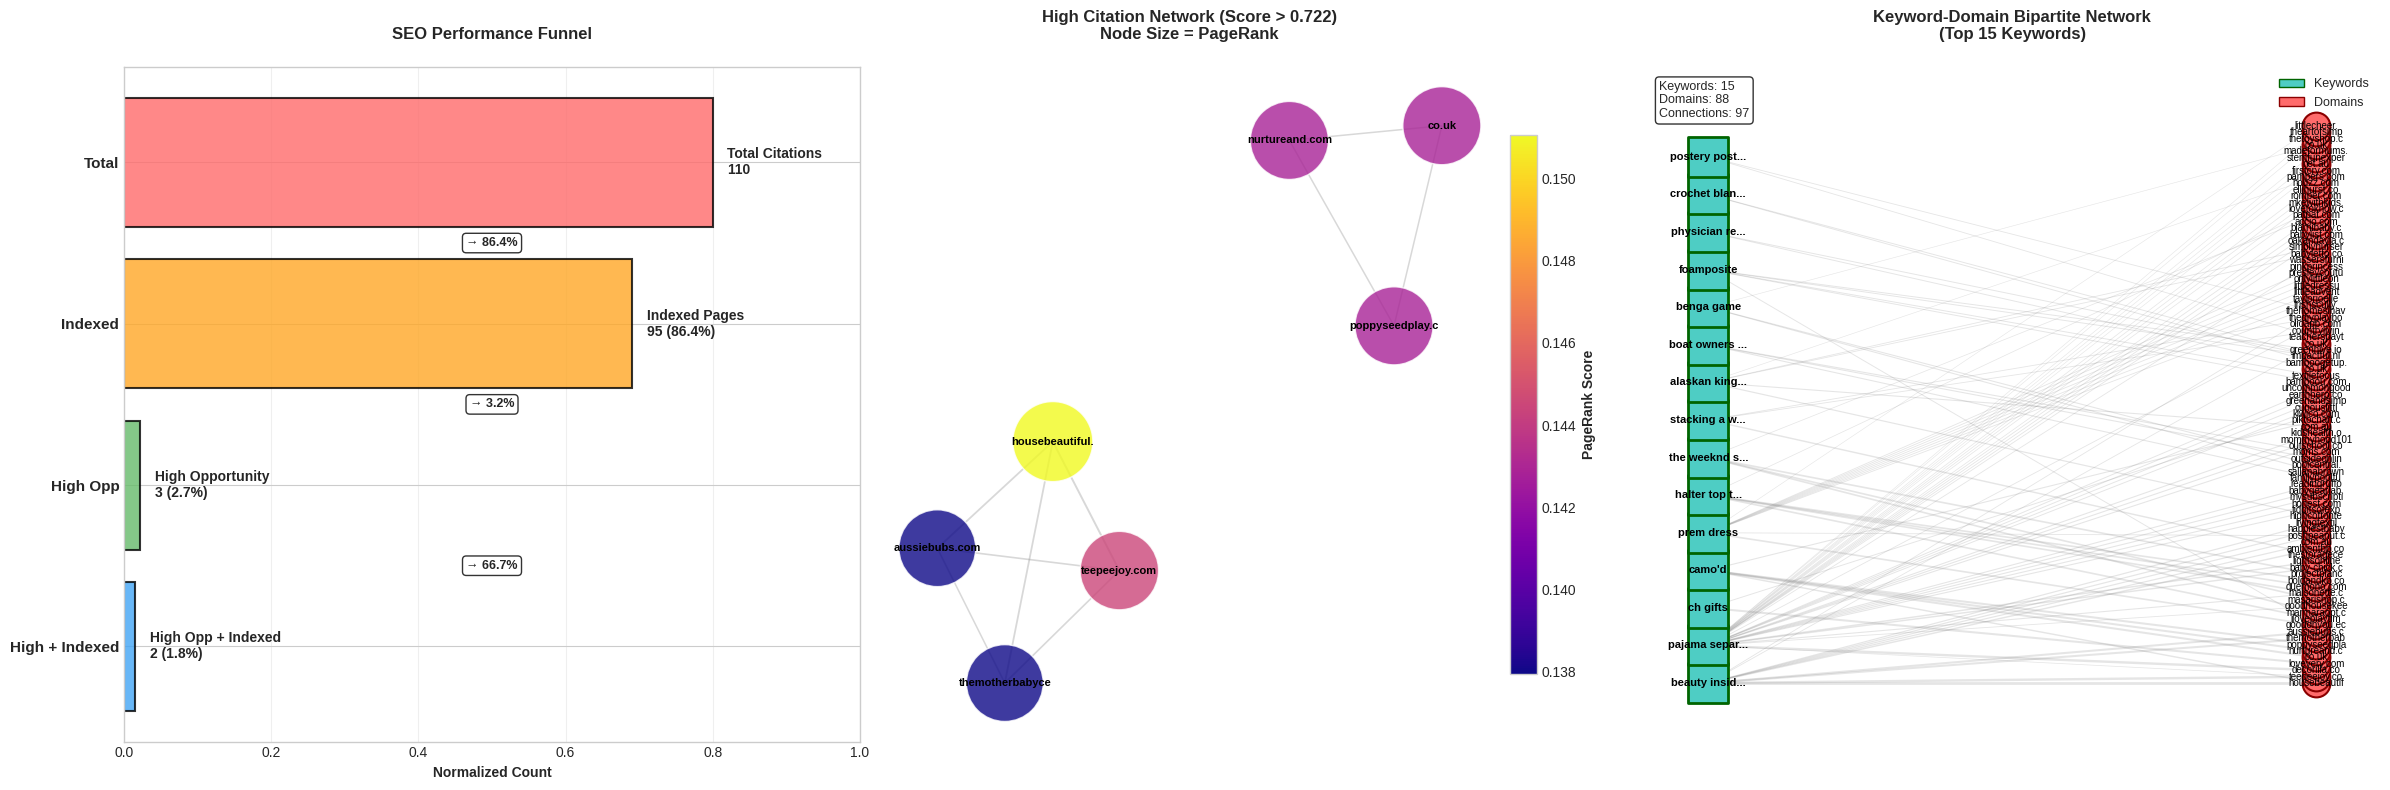

 Saved: advanced_seo_05_networks_funnel.png

  SUMMARY

Generated 7 Advanced Visualizations:

1.  Quadrant Analysis - Strategic keyword positioning
2.  Domain Heatmap - Strength relationships matrix
3.  Performance Comparison - Multi-metric domain analysis
4.  Distribution Analysis - Statistical insights
5.  Performance Funnel - Conversion metrics
6.  High Citation Network - PageRank analysis (Score > 0.722)
7.  Bipartite Network - Keyword-domain relationships (Top 15)

Key Metrics:
• Total Citations: 110
• High Opportunities: 3 (2.7%)
• High Citations (>0.722): 9 (8.2%)
• Indexed Pages: 95 (86.4%)
• Avg Strength: 0.401

Network Insights:
• High Citation Network: 7 nodes, 9 edges
• Bipartite Network: 15 keywords, 88 domains, 97 connections

Ready for Looker Dashboard Integration



In [ ]:
# Cell 7: Visualization 5, 6 & 7 - Performance Funnel + High Citation Network + Bipartite Network
print("\n[6/6] Creating Visualizations 5, 6 & 7: Performance Funnel + Networks...")

# Create a 3-panel layout
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# ==================== VISUALIZATION 5: PERFORMANCE FUNNEL ====================
funnel_data = [
    len(df),  # Total citations
    df['page_indexed'].sum(),  # Indexed
    (df['opportunity_level'] == 'High').sum(),  # High opportunity
    len(df[(df['opportunity_level'] == 'High') & (df['page_indexed'])])  # High opp & indexed
]

funnel_labels = [
    f'Total Citations\n{funnel_data[0]:,}',
    f'Indexed Pages\n{funnel_data[1]:,} ({funnel_data[1]/funnel_data[0]*100:.1f}%)',
    f'High Opportunity\n{funnel_data[2]:,} ({funnel_data[2]/funnel_data[0]*100:.1f}%)',
    f'High Opp + Indexed\n{funnel_data[3]:,} ({funnel_data[3]/funnel_data[0]*100:.1f}%)'
]

# Create funnel chart - FIXED: Convert to numpy array properly
y_pos = np.arange(len(funnel_data))
width = np.array(funnel_data, dtype=float) / max(funnel_data) * 0.8  # FIXED: Explicit dtype

# Modern gradient colors
colors = ['#FF6B6B', '#FFA726', '#66BB6A', '#42A5F5']

bars = ax1.barh(y_pos, width, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels
for i, (bar, value, label) in enumerate(zip(bars, funnel_data, funnel_labels)):
    ax1.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, label,
            va='center', fontsize=10, fontweight='bold')

# Modern styling
ax1.set_xlim(0, 1)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(['Total', 'Indexed', 'High Opp', 'High + Indexed'], fontsize=11, fontweight='bold')
ax1.set_xlabel('Normalized Count', fontweight='bold')
ax1.set_title('SEO Performance Funnel', fontsize=12, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Add conversion rates
conversion_rates = [
    f'→ {funnel_data[1]/funnel_data[0]*100:.1f}%',
    f'→ {funnel_data[2]/funnel_data[1]*100:.1f}%' if funnel_data[1] > 0 else '→ 0%',
    f'→ {funnel_data[3]/funnel_data[2]*100:.1f}%' if funnel_data[2] > 0 else '→ 0%'
]

for i, rate in enumerate(conversion_rates):
    ax1.text(0.5, i + 0.5, rate, ha='center', va='center', fontsize=9,
            fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# ==================== VISUALIZATION 6: HIGH CITATION NETWORK ====================
print("   Creating High Citation Score Network (Score > 0.722)...")

G_high = nx.Graph()
threshold = 0.722  # High citation threshold

# Filter high citation scores
df_high = df[df['cooccurrence_strength_normalized'] > threshold]

print(f"   → Using {len(df_high)} records with citation score > {threshold}")

# Create network from high-scoring citations
for keyword, group in df_high.groupby('keyword'):
    if len(group) > 1 and keyword != 'not in DFS':
        domains = group['domain'].tolist()
        scores = group['cooccurrence_strength_normalized'].tolist()
        for i, d1 in enumerate(domains):
            for j, d2 in enumerate(domains[i+1:], start=i+1):
                avg_score = (scores[i] + scores[j]) / 2
                if G_high.has_edge(d1, d2):
                    G_high[d1][d2]['weight'] += avg_score
                else:
                    G_high.add_edge(d1, d2, weight=avg_score)

print(f"   → High citation network: {G_high.number_of_nodes()} nodes, {G_high.number_of_edges()} edges")

if G_high.number_of_nodes() > 0:
    # Calculate PageRank for node sizing
    try:
        pagerank = nx.pagerank(G_high, weight='weight')
    except:
        pagerank = {node: 1/len(G_high.nodes()) for node in G_high.nodes()}

    node_sizes = [pagerank[node] * 20000 + 300 for node in G_high.nodes()]
    edge_widths = [G_high[u][v]['weight'] * 1.5 for u, v in G_high.edges()]

    pos = nx.spring_layout(G_high, k=1, iterations=50, seed=42)

    nodes = nx.draw_networkx_nodes(G_high, pos,
                                  node_size=node_sizes,
                                  node_color=list(pagerank.values()),
                                  cmap='plasma',
                                  alpha=0.8,
                                  edgecolors='white',
                                  linewidths=1,
                                  ax=ax2)

    nx.draw_networkx_edges(G_high, pos,
                          width=edge_widths,
                          alpha=0.3,
                          edge_color='gray',
                          ax=ax2)

    # Label top nodes by PageRank
    if len(pagerank) > 0:
        top_nodes = sorted(pagerank, key=pagerank.get, reverse=True)[:12]
        labels = {node: '.'.join(node.split('//')[-1].split('.')[-2:])[:15] for node in top_nodes}
        nx.draw_networkx_labels(G_high, pos, labels,
                               font_size=8,
                               font_weight='bold',
                               ax=ax2)

    ax2.set_title(f'High Citation Network (Score > {threshold})\nNode Size = PageRank',
                 fontsize=12, fontweight='bold', pad=20)
    ax2.axis('off')

    # Add colorbar for PageRank
    if len(pagerank) > 0:
        sm = plt.cm.ScalarMappable(cmap='plasma',
                                  norm=plt.Normalize(vmin=min(pagerank.values()),
                                                    vmax=max(pagerank.values())))
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax2, shrink=0.8, pad=0.02)
        cbar.set_label('PageRank Score', fontsize=10, fontweight='bold')

else:
    ax2.text(0.5, 0.5, f'No high citation network\n(Score > {threshold})',
            ha='center', va='center', fontsize=11, transform=ax2.transAxes)
    ax2.axis('off')

# ==================== VISUALIZATION 7: KEYWORD-DOMAIN BIPARTITE NETWORK ====================
print("   Creating Keyword-Domain Bipartite Network (Top 15 Keywords)...")

B = nx.Graph()
top_keywords = df[df['keyword'] != 'not in DFS']['keyword'].value_counts().head(15).index

# Add nodes and edges for top keywords
for _, row in df[df['keyword'].isin(top_keywords)].iterrows():
    B.add_node(row['keyword'], bipartite=0, node_type='keyword')
    B.add_node(row['domain'], bipartite=1, node_type='domain')
    B.add_edge(row['keyword'], row['domain'], weight=row['cooccurrence_strength_normalized'])

# Separate node sets
keyword_nodes = [n for n, d in B.nodes(data=True) if d.get('node_type') == 'keyword']
domain_nodes = [n for n, d in B.nodes(data=True) if d.get('node_type') == 'domain']

print(f"   → Bipartite network: {len(keyword_nodes)} keywords, {len(domain_nodes)} domains")

if len(keyword_nodes) > 0 and len(domain_nodes) > 0:
    # Create bipartite layout
    pos = {}

    # Keywords on left with spacing
    keyword_height = max(10, len(keyword_nodes))  # Ensure minimum height
    for i, node in enumerate(keyword_nodes):
        pos[node] = (0, i * (10.0 / keyword_height))

    # Domains on right with spacing
    domain_height = max(10, len(domain_nodes))
    for i, node in enumerate(domain_nodes):
        pos[node] = (3, i * (10.0 / domain_height))

    # Draw keywords (left)
    nx.draw_networkx_nodes(B, pos, nodelist=keyword_nodes,
                          node_color='#4ECDC4',
                          node_size=800,
                          node_shape='s',
                          edgecolors='darkgreen',
                          linewidths=2,
                          ax=ax3)

    # Draw domains (right)
    nx.draw_networkx_nodes(B, pos, nodelist=domain_nodes,
                          node_color='#FF6B6B',
                          node_size=400,
                          node_shape='o',
                          edgecolors='darkred',
                          linewidths=1.5,
                          ax=ax3)

    # Draw edges with strength-based width
    edge_weights = [B[u][v]['weight'] * 2 for u, v in B.edges()]
    nx.draw_networkx_edges(B, pos,
                          width=edge_weights,
                          alpha=0.2,
                          edge_color='gray',
                          ax=ax3)

    # Keyword labels (left)
    keyword_labels = {n: n[:12] + '...' if len(n) > 12 else n for n in keyword_nodes}
    nx.draw_networkx_labels(B, pos, keyword_labels,
                           font_size=8,
                           font_weight='bold',
                           ax=ax3)

    # Domain labels (right) - shortened
    domain_labels = {n: '.'.join(n.split('//')[-1].split('.')[-2:])[:12] for n in domain_nodes}
    nx.draw_networkx_labels(B, pos, domain_labels,
                           font_size=7,
                           ax=ax3)

    ax3.set_title('Keyword-Domain Bipartite Network\n(Top 15 Keywords)',
                 fontsize=12, fontweight='bold', pad=20)
    ax3.axis('off')

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#4ECDC4', edgecolor='darkgreen', label='Keywords'),
        Patch(facecolor='#FF6B6B', edgecolor='darkred', label='Domains')
    ]
    ax3.legend(handles=legend_elements, loc='upper right', fontsize=9)

    # Add statistics
    stats_text = f"Keywords: {len(keyword_nodes)}\nDomains: {len(domain_nodes)}\nConnections: {B.number_of_edges()}"
    ax3.text(0.02, 0.98, stats_text, transform=ax3.transAxes, fontsize=9,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

else:
    ax3.text(0.5, 0.5, 'No bipartite network data',
            ha='center', va='center', fontsize=11, transform=ax3.transAxes)
    ax3.axis('off')

plt.tight_layout()
plt.savefig(f'{OUTPUT_PREFIX}05_networks_funnel.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print(" Saved: advanced_seo_05_networks_funnel.png")

# ==================== EXECUTIVE SUMMARY ====================
print("\n" + "="*80)
print("SUMMARY")
print("="*80)

total_records = len(df)
high_opp_count = (df['opportunity_level'] == 'High').sum()
indexed_count = df['page_indexed'].sum()
high_citation_count = (df['cooccurrence_strength_normalized'] > 0.722).sum()

summary = f"""
Generated 7 Advanced Visualizations:

1.  Quadrant Analysis - Strategic keyword positioning
2.  Domain Heatmap - Strength relationships matrix
3.  Performance Comparison - Multi-metric domain analysis
4.  Distribution Analysis - Statistical insights
5.  Performance Funnel - Conversion metrics
6.  High Citation Network - PageRank analysis (Score > 0.722)
7.  Bipartite Network - Keyword-domain relationships (Top 15)

Key Metrics:
• Total Citations: {total_records:,}
• High Opportunities: {high_opp_count:,} ({high_opp_count/total_records*100:.1f}%)
• High Citations (>0.722): {high_citation_count:,} ({high_citation_count/total_records*100:.1f}%)
• Indexed Pages: {indexed_count:,} ({indexed_count/total_records*100:.1f}%)
• Avg Strength: {df['cooccurrence_strength_normalized'].mean():.3f}

Network Insights:
• High Citation Network: {G_high.number_of_nodes()} nodes, {G_high.number_of_edges()} edges
• Bipartite Network: {len(keyword_nodes)} keywords, {len(domain_nodes)} domains, {B.number_of_edges()} connections

Ready for Looker Dashboard Integration
"""
print(summary)
print("="*80)